In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import statistics
from sklearn import metrics
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('Iris.csv')

In [85]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [88]:
x_train, x_test, y_train, y_test = train_test_split(df[['SepalLengthCm', 'SepalWidthCm', 
                                                        'PetalLengthCm', 'PetalWidthCm']],
                                                    df['Species'], random_state = 0, train_size = 0.6, test_size = 0.4, stratify = df['Species'])

In [89]:
print("x_train shape: {}\ny_train shape: {}".format(x_train.shape, y_train.shape))
print("x_test shape: {}\ny_test shape: {}".format(x_test.shape, y_test.shape))

x_train shape: (90, 4)
y_train shape: (90,)
x_test shape: (60, 4)
y_test shape: (60,)


# Use random KNN value

In [108]:
knn = KNeighborsClassifier(n_neighbors=47, metric = 'euclidean')

In [109]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy rate: ', metrics.accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy rate:  0.85
Confusion matrix:
[[20  0  0]
 [ 1 17  2]
 [ 0  6 14]]
                 precision    recall  f1-score   support

    Iris-setosa       0.95      1.00      0.98        20
Iris-versicolor       0.74      0.85      0.79        20
 Iris-virginica       0.88      0.70      0.78        20

       accuracy                           0.85        60
      macro avg       0.86      0.85      0.85        60
   weighted avg       0.86      0.85      0.85        60



# Plot accuracy scores of train vs test experimenting with different n values

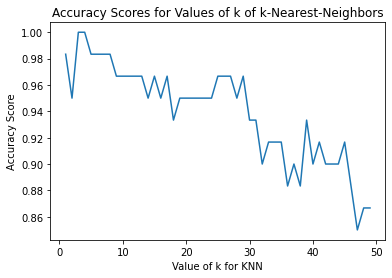

In [94]:
k_range = list(range(1,50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k ,metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# show accuracy scores after call function KNN by using eucliedean metric for distance calculation

In [95]:
data = {'K_range': k_range,
        'Scores': scores}
df = pd.DataFrame(data)
print(df)

    K_range    Scores
0         1  0.983333
1         2  0.950000
2         3  1.000000
3         4  1.000000
4         5  0.983333
5         6  0.983333
6         7  0.983333
7         8  0.983333
8         9  0.966667
9        10  0.966667
10       11  0.966667
11       12  0.966667
12       13  0.966667
13       14  0.950000
14       15  0.966667
15       16  0.950000
16       17  0.966667
17       18  0.933333
18       19  0.950000
19       20  0.950000
20       21  0.950000
21       22  0.950000
22       23  0.950000
23       24  0.950000
24       25  0.966667
25       26  0.966667
26       27  0.966667
27       28  0.950000
28       29  0.966667
29       30  0.933333
30       31  0.933333
31       32  0.900000
32       33  0.916667
33       34  0.916667
34       35  0.916667
35       36  0.883333
36       37  0.900000
37       38  0.883333
38       39  0.933333
39       40  0.900000
40       41  0.916667
41       42  0.900000
42       43  0.900000
43       44  0.900000
44       4

# Get KNeighbors value which generate high accuracy score

In [96]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')

In [97]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy rate: ', metrics.accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy rate:  1.0
Confusion matrix:
[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        20

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60



#Comparison between other models






* LogisticRegression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logreg = LogisticRegression()
y_pred = logreg.fit(x_train, y_train).predict(x_test)
print('Accuracy rate: ', metrics.accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy rate:  0.9833333333333333
Confusion matrix:
[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.95      1.00      0.98        20

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


* GaussianNB 

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print('Accuracy rate: ', metrics.accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy rate:  0.9666666666666667
Confusion matrix:
[[20  0  0]
 [ 0 19  1]
 [ 0  1 19]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.95      0.95      0.95        20

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60

